# Оцінка моделі 1

In [2]:
from keras.models import load_model
from tensorflow.keras.layers import Layer
from transformers import TFBertModel, TFBertMainLayer, BertConfig
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
try:
    model = tf.keras.models.load_model('model-1.h5', compile=False)
    print("Модель успішно завантажена!")
except Exception as e:
    print(f"Помилка завантаження моделі: {e}")

2024-12-31 12:05:14.225185: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Модель успішно завантажена!


In [52]:
# Завантаження тестових даних
test_data = pd.read_csv('../goit_ds_ml/toxic_finder/test_data.csv')
test_data.head()

,id,cleaned_comment_text,input_ids,attention_masks,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding I think very highl...,"[101, 4067, 2017, 2005, 4824, 1045, 2228, 2200...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,0,0,0,0,0
1,000247e83dcc1211,Dear god this site is horrible,"[101, 6203, 2643, 2023, 2609, 2003, 9202, 102,...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0
2,0002f87b16116a7f,Somebody will invariably try to add Religion R...,"[101, 8307, 2097, 26597, 3046, 2000, 5587, 467...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,0,0,0,0,0
3,0003e1cccfd5a40a,It says it right there that it IS a type The T...,"[101, 2009, 2758, 2009, 2157, 2045, 2008, 2009...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,0,0,0,0,0
4,00059ace3e3e9a53,Before adding a new product to the list make s...,"[101, 2077, 5815, 1037, 2047, 4031, 2000, 1996...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,0,0,0,0,0


In [53]:
input_ids = np.array([eval(item) for item in  test_data['input_ids']])
attention_masks = np.array([eval(item) for item in  test_data['attention_masks']])
y_test = np.array(test_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']])

# Витягнення справжніх міток
true_labels = test_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

In [5]:
#  Отримання прогнозів моделі
predictions = model.predict({'input_ids': input_ids, 'attention_mask': attention_masks})

2000/2000 [==============================] - 17809s 9s/step


In [6]:
np.save('predictions1.npy', predictions)

## 1. Класифікаційний звіт
Генерація звіту, який включає наступні метрики:  
Precision (Точність): Частка правильно передбачених позитивних прикладів серед усіх прикладів, передбачених як позитивні.  
Recall (Повнота): Частка правильно передбачених позитивних прикладів серед усіх реальних позитивних прикладів.  
F1-score: Гармонійне середнє між точністю та повнотою.  
Support: Кількість реальних прикладів для кожного класу.

In [47]:
# Перетворення прогнозів у бінарний формат
threshold = 0.5
preds_binary = (predictions >= threshold).astype(int)

# Оцінка за допомогою класифікаційного звіту
print("Classification Report:\n", classification_report(true_labels, preds_binary, target_names=[
    'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'
]))

Classification Report:
                precision    recall  f1-score   support

        toxic       0.10      1.00      0.17      6090
 severe_toxic       0.00      0.00      0.00       367
      obscene       0.15      0.19      0.17      3691
       threat       0.00      0.00      0.00       211
       insult       0.19      0.06      0.10      3427
identity_hate       0.11      0.00      0.01       712

    micro avg       0.10      0.48      0.17     14498
    macro avg       0.09      0.21      0.07     14498
 weighted avg       0.13      0.48      0.14     14498
  samples avg       0.09      0.06      0.06     14498



/Users/lena/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lena/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Висновок:
1.Загальна ефективність моделі досить низька, що видно з мікро- та макро-середніх показників (f1-score близько 0.07-0.17).

По окремих класах:  
"toxic": має високий recall (1.00), але дуже низьку precision (0.10), що означає що модель позначає як токсичні багато невинних коментарів;
"severe_toxic" і "threat": модель повністю провалилась (всі метрики 0.00);  
"obscene": показує трохи кращі результати (precision 0.15, recall 0.19);  
"insult": має найвищу precision (0.19), але дуже низький recall (0.06);   
"identity_hate": практично не визначається (f1-score лише 0.01).

## 2.Обчислення метрики ROC-AUC для кожного класу
ROC-AUC (Receiver Operating Characteristic - Area Under Curve) є мірою якості класифікатора, яка оцінює, наскільки добре модель відділяє позитивні та негативні зразки. Значення варіюється в межах від 0 до 1:

1.0: Ідеальний класифікатор (усі позитивні й негативні зразки правильно розділені).  
0.5: Випадкове вгадування (модель не може відрізнити класи).  
Менше 0.5: Модель працює гірше, ніж випадкове вгадування (інверсія передбачень).  

In [48]:
from sklearn.metrics import classification_report, roc_auc_score
roc_auc_scores = {
    label: roc_auc_score(true_labels[:, i], predictions[:, i]) for i, label in enumerate([
        'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'
    ])
}
print("ROC-AUC Scores:")
for label, score in roc_auc_scores.items():
    if score == 1.0:
        explanation = "Ідеальний класифікатор."
    elif score == 0.5:
        explanation = "Випадкове вгадування."
    elif score > 0.5:
        explanation = "Модель краще, ніж випадкове вгадування."
    else:
        explanation = "Модель працює гірше, ніж випадкове вгадування."
    
    print(f"{label.capitalize():<15}: {score:.3f} - {explanation}")

ROC-AUC Scores:
Toxic          : 0.348 - Модель працює гірше, ніж випадкове вгадування.
Severe_toxic   : 0.689 - Модель краще, ніж випадкове вгадування.
Obscene        : 0.507 - Модель краще, ніж випадкове вгадування.
Threat         : 0.567 - Модель краще, ніж випадкове вгадування.
Insult         : 0.546 - Модель краще, ніж випадкове вгадування.
Identity_hate  : 0.434 - Модель працює гірше, ніж випадкове вгадування.


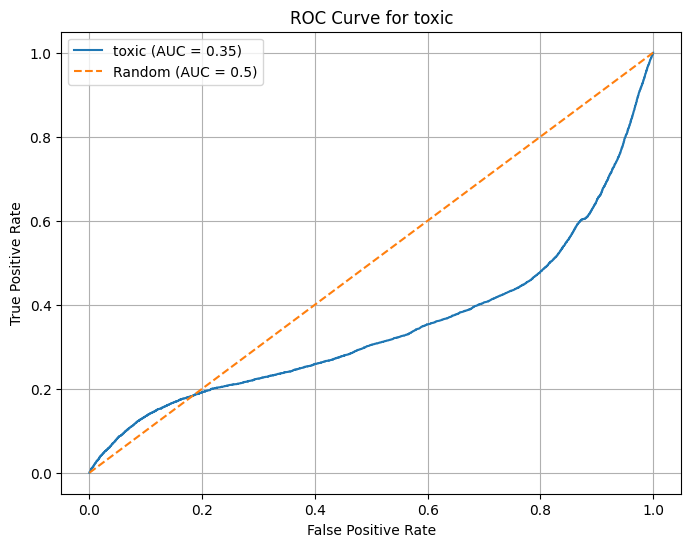

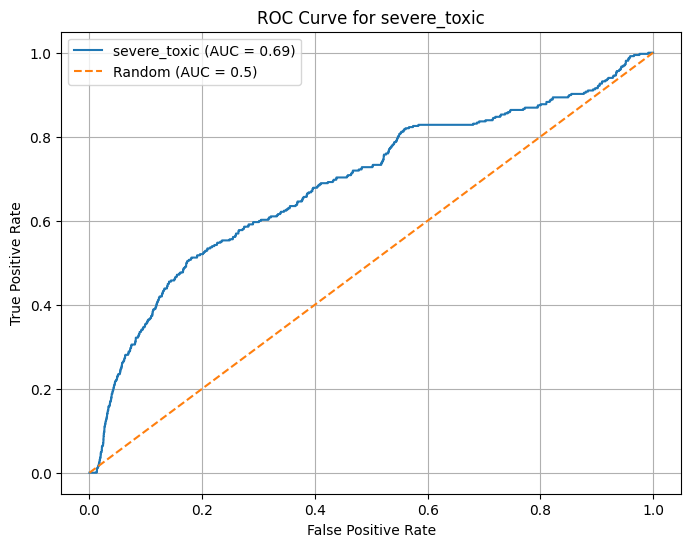

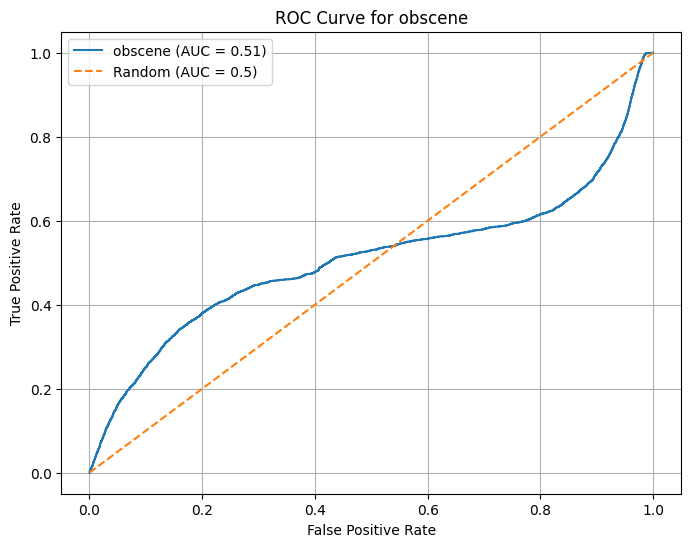

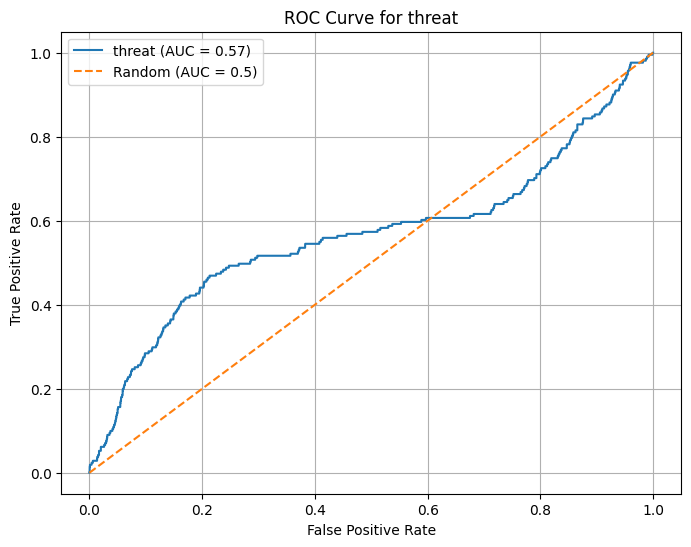

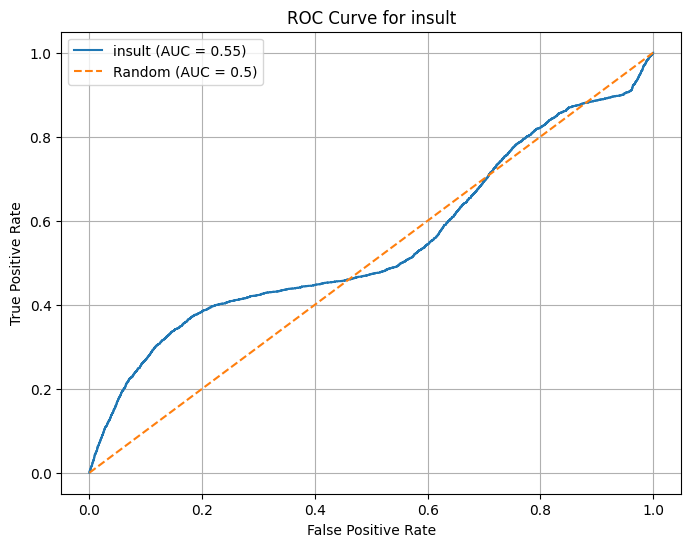

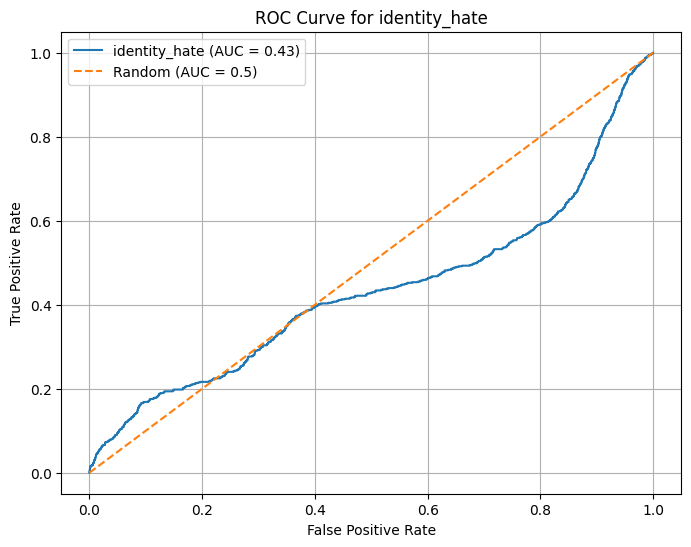

In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
test_labels_binary = np.array(test_labels)

for i, class_name in enumerate(class_names):
    y_true_class = (y_test[:, i] == 1).astype(int)  # Бінарні мітки для класу i
    fpr, tpr, thresholds = roc_curve(y_true_class, predictions[:, i])
    auc_score = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random (AUC = 0.5)')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {class_name}")
    plt.legend()
    plt.grid(True)
    plt.show()


## 3. Confusion Matrix
Для кожного класу побудована матриця плутанини, яка відображає кількість:  
True Positives (TP): Правильно передбачені позитивні випадки.  
True Negatives (TN): Правильно передбачені негативні випадки.  
False Positives (FP): Негативні випадки, передбачені як позитивні.  
False Negatives (FN): Позитивні випадки, передбачені як негативні.  

[[    1 57887]
 [    0  6090]]


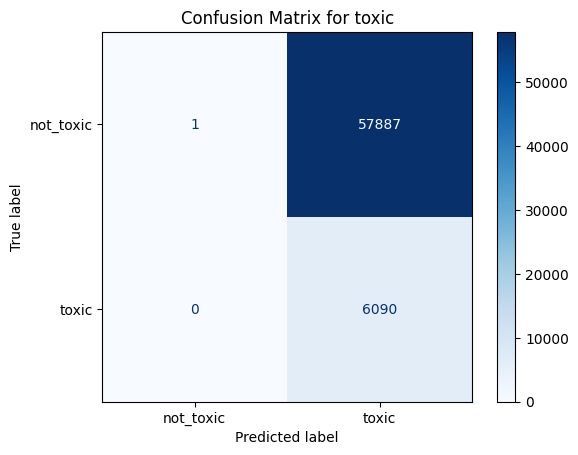

[[63611     0]
 [  367     0]]


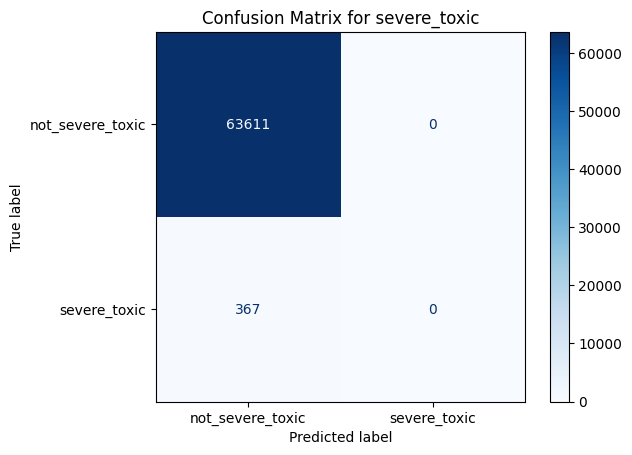

[[56463  3824]
 [ 3003   688]]


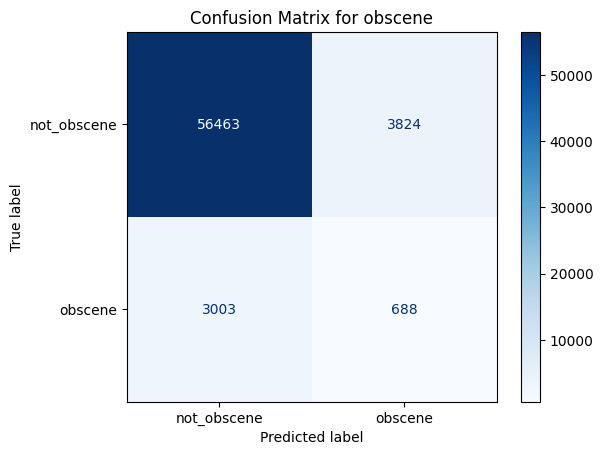

[[63752    15]
 [  211     0]]


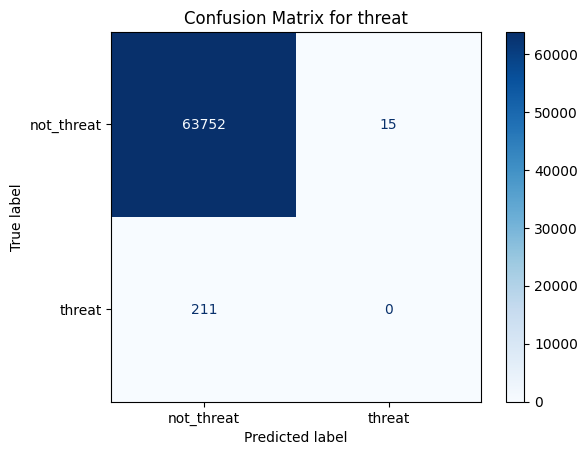

[[59593   958]
 [ 3207   220]]


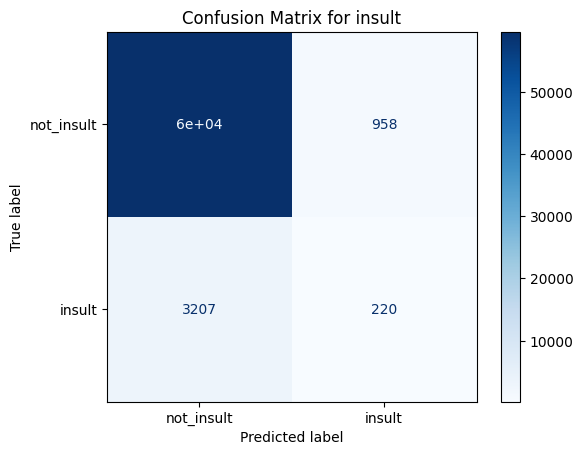

[[63250    16]
 [  710     2]]


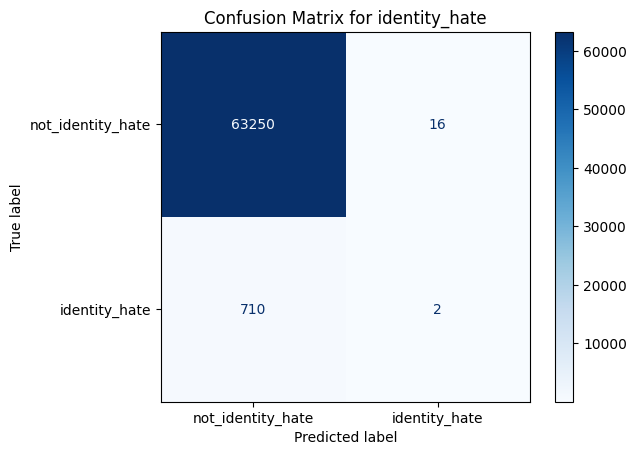

In [62]:
for i, class_name in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    cm = confusion_matrix(y_test[:, i], preds_binary[:, i])
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"not_{class_name}", class_name])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {class_name}")
    plt.show()

### Висновок:
1. Confusion Matrix for toxic

Надзвичайно велика кількість FP = 6090, що вказує на те, що модель часто помилково класифікує "не токсичні" зразки як "токсичні".

2. Confusion Matrix for severe toxic

Модель не класифікує жодного зразка як "severe toxic" (TP = 0).

3. Confusion Matrix for obscene

TP = 688 досить низький, що свідчить про слабку чутливість моделі до "obscene" зразків.
FN = 3003, що означає багато пропущених випадків позитивного класу.

4. Confusion Matrix for threat

Відсутність TP (жоден зразок не класифікується правильно як "threat").  

5. Confusion Matrix for insult

Відносно низький TP = 220, що свідчить про недостатню чутливість.
FN = 3207 показує, що модель пропускає значну кількість образливих випадків.

6. Confusion Matrix for identity hate

Дуже низький TP = 2.
FN = 710 свідчить про те, що модель не здатна розпізнати "identity hate".

## 4. Історія навчання моделі

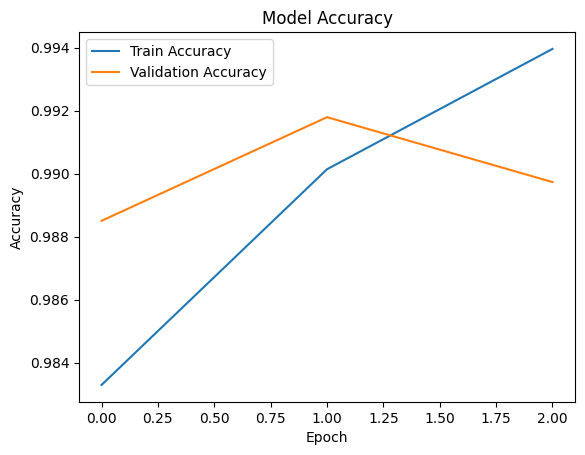

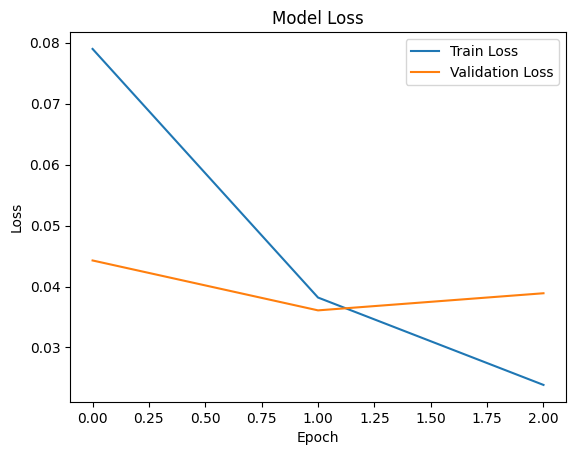

In [60]:
import json
with open('training_history_model-1.json', "r") as file:
    history = json.load(file)

if history:
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

### Висновок
Графік точності:  
Тренувальна точність (Train Accuracy): Тренувальна точність постійно зростає і досягає дуже високих значень (~0.994) до кінця епох.  
Валідаційна точність (Validation Accuracy): Спочатку також зростає, але після певного моменту (2 епоха) починає знижуватися.  
Графік втрат:  
Тренувальні втрати (Train Loss): Постійно зменшуються, що свідчить про те, що модель добре адаптується до тренувальних даних.  
Валідаційні втрати (Validation Loss): Зменшуються спочатку, але після 2 епохи починають зростати.  

Отже, модель, ймовірно, перенавчається після 2 епохи. Це видно з того, що валідаційна точність починає знижуватися, а валідаційні втрати — зростати, тоді як тренувальні метрики продовжують покращуватися.

## 5. Оцінка прогнозів на конкретних прикладах

In [61]:

threshold = 0.5
preds_binary = (predictions > threshold).astype(int)

# Виведення кількох прикладів коментарів із їхніми оцінками
for i in range(263, 267):  # Вивести 5 перших записів
    print(f"Comment {i + 1}: {test_data['cleaned_comment_text'].iloc[i]}")
    print(f"\nPredicted labels:\n-toxic={preds_binary[i, 0]}\n-severe_toxic={preds_binary[i, 1]}"
          f"\n-obscene={preds_binary[i, 2]}\n-threat={preds_binary[i, 3]}"
          f"\n-insult={preds_binary[i, 4]}\n-identity_hate={preds_binary[i, 5]}")
    print(f"\nTrue labels:\n-toxic={test_data['toxic'].iloc[i]}\n-severe_toxic={test_data['severe_toxic'].iloc[i]}, "
          f"\n-obscene={test_data['obscene'].iloc[i]}\n-threat={test_data['threat'].iloc[i]}, "
          f"\n-insult={test_data['insult'].iloc[i]}\n-identity_hate={test_data['identity_hate'].iloc[i]}")
    print("-" * 80)



Comment 264: casualt i fucked your mum and i liked it ies

Predicted labels:
-toxic=1
-severe_toxic=0
-obscene=0
-threat=0
-insult=0
-identity_hate=0

True labels:
-toxic=1
-severe_toxic=1, 
-obscene=1
-threat=0, 
-insult=1
-identity_hate=0
--------------------------------------------------------------------------------
Comment 265: Keep in find complete lies are still nonfiction if that is the format they present themselves in Hitlers propaganda was nonfiction in that it was not a work of imagination Instead it was untrue but still had a nonfiction format The reason it was untrue was not because it was imagined but instead it was because it was a product of misinformation ignorance and what is largely considered evil

Predicted labels:
-toxic=1
-severe_toxic=0
-obscene=0
-threat=0
-insult=0
-identity_hate=0

True labels:
-toxic=0
-severe_toxic=0, 
-obscene=0
-threat=0, 
-insult=0
-identity_hate=0
--------------------------------------------------------------------------------
Comment 